# Task 1: Exploratory Data Analysis (EDA):

In [1]:
# Load the dataset into a DataFrame 
import pandas as pd 
wine_data=pd.read_csv("E:/DS ASSIGNMENTS/PCA/wine.csv") 
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
# Shape of the data
wine_data.shape

(178, 14)

In [3]:
# Data Information
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
# Data Description
wine_data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
# Get the data types of each column.
wine_data.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

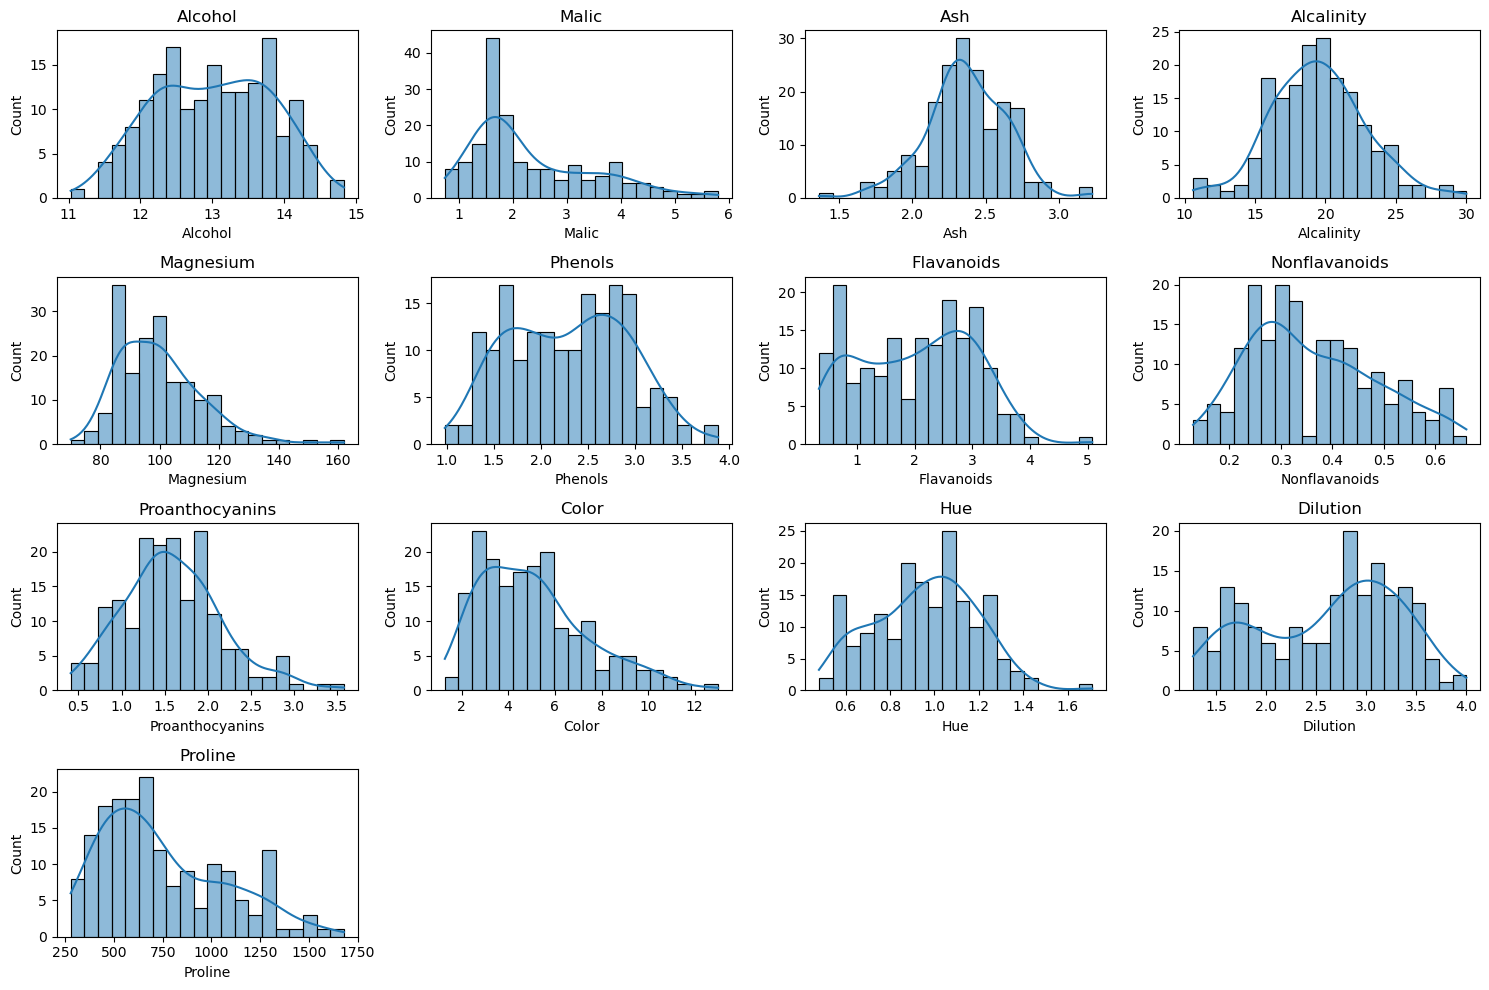

In [6]:
# Examine the distribution of features using histogram.

import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = wine_data.columns[1:]  # Exclude the 'Type' column for this analysis

# Create histograms
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.histplot(wine_data[feature], kde=True, bins=20)
    plt.title(feature)

plt.tight_layout()
plt.show()


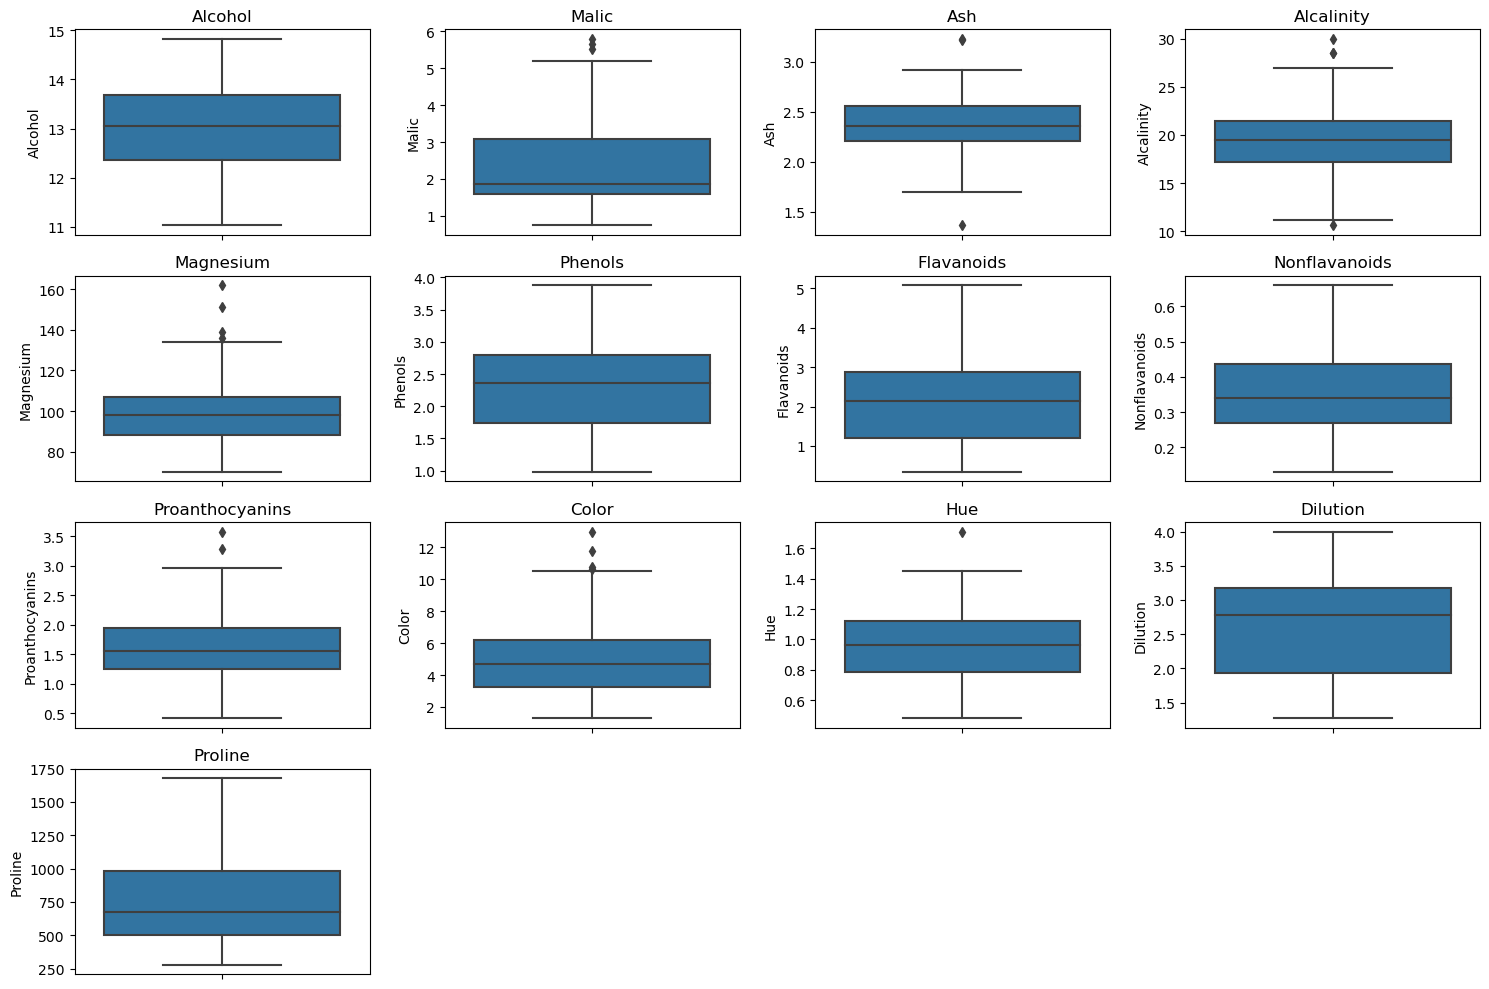

In [7]:
# Examine the distribution of features using box plots.
# Create box plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=wine_data[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()


                     Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911   -0.276769   
Prolin

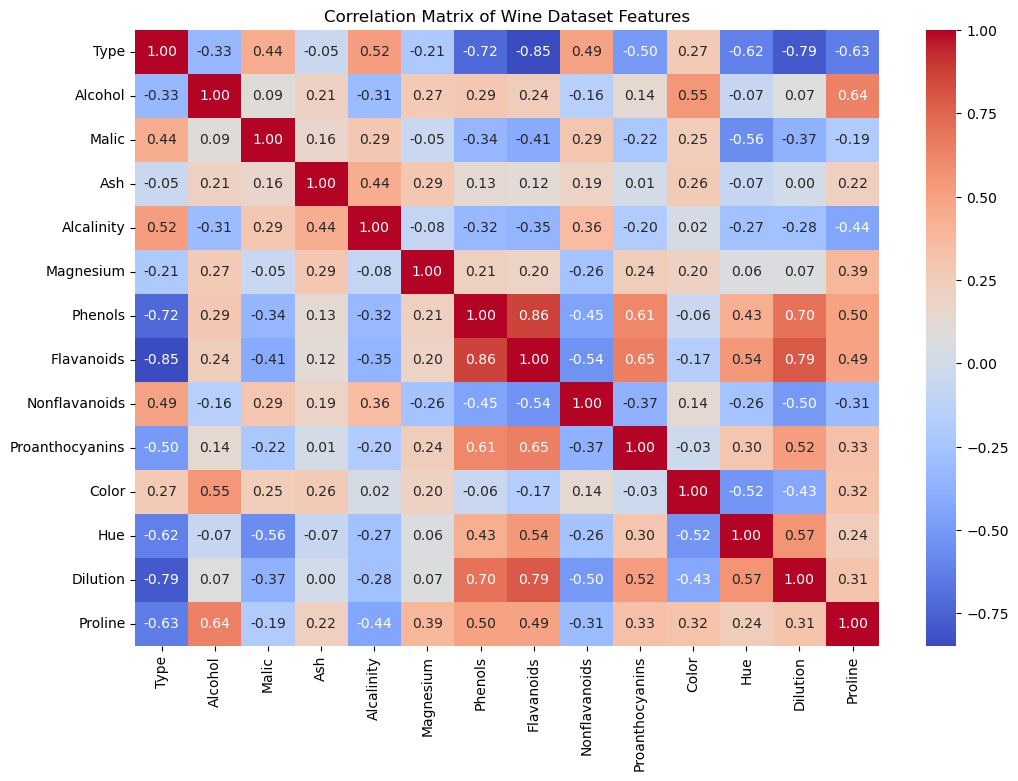

In [8]:
# Investigating correlations between features to understand relationships within the data using heatmap.
# Calculate the correlation matrix
correlation_matrix = wine_data.corr()
print(correlation_matrix)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Wine Dataset Features')
plt.show()


# Task 2: Dimensionality Reduction with PCA:

In [9]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_data_scaled = scaler.fit_transform(wine_data.iloc[:, 1:])
wine_data_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [10]:
# 3.Transform the original dataset into the principal components.
from sklearn.decomposition import PCA
pca = PCA()
PC = pca.fit_transform(wine_data_scaled)
# Dataframe of PC
PC = pd.DataFrame(PC)
PC

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


In [11]:
# to check the percentages or ratio each PCA columns
d1 = pd.DataFrame(pca.explained_variance_ratio_)
d1

,0
0,0.361988
1,0.192075
2,0.111236
3,0.070690
4,0.065633
5,0.049358
6,0.042387
7,0.026807
8,0.022222
9,0.019300


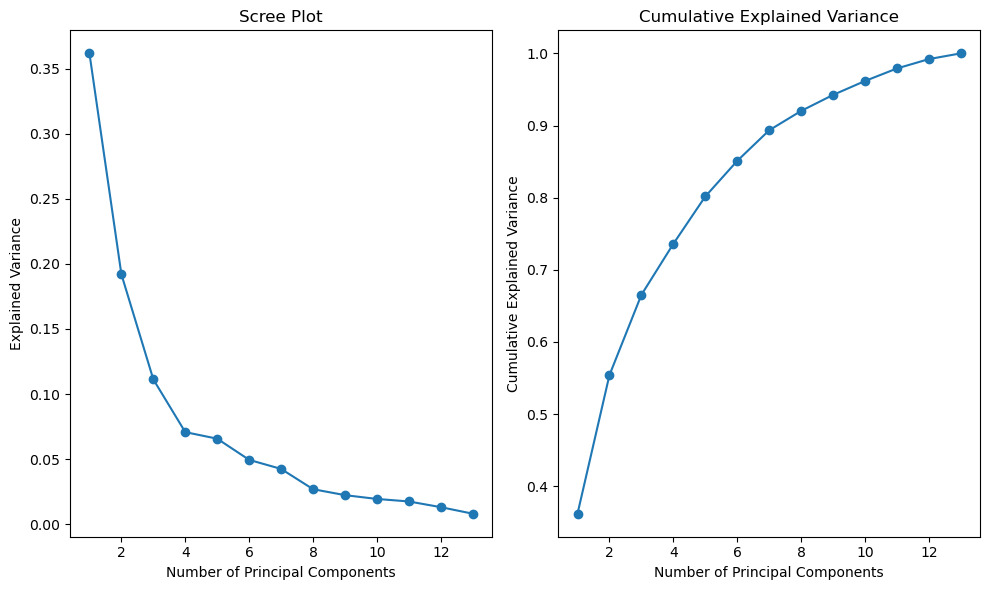

In [12]:
# scree plot and cumulative plots
# Calculate the cumulative explained variance
pca_full = PCA()
pca_full.fit(wine_data_scaled)
cumulative_explained_variance = pca_full.explained_variance_ratio_.cumsum()

# Plot the scree plot and cumulative explained variance
plt.figure(figsize=(10, 6))

# Scree plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(cumulative_explained_variance) + 1), pca_full.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')

# Cumulative explained variance plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

# Task 3: Clustering with Original Data:

In [13]:
# K-Means Clustering 
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)

# Fitting with inputs
kmeans=kmeans.fit(wine_data_scaled)

# Predict the cluster
wine_data['Kmeans']=kmeans.predict(wine_data_scaled)



C:\Users\patil\anaconda3\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patil\anaconda3\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
# silhouette score
from sklearn.metrics import silhouette_score
silhouettescore=silhouette_score(wine_data_scaled,wine_data["Kmeans"])
silhouettescore

0.28594199657074876

In [15]:
# K-Means Clustering scores
scores=[]

for i in range(2,11):
    kmeans=KMeans(n_clusters=i)
    kmeans=kmeans.fit(wine_data_scaled)
    wine_data["Kmeans"]=kmeans.predict(wine_data_scaled)
    scores.append(silhouette_score(wine_data_scaled,wine_data["Kmeans"]))
print("# K-Means Clustering scores : ",scores)


C:\Users\patil\anaconda3\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patil\anaconda3\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patil\anaconda3\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patil\anaconda3\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

# K-Means Clustering scores :  [0.25931695553182543, 0.2848589191898987, 0.2614352045273167, 0.20245339742035257, 0.23103534110777255, 0.16547216817828417, 0.13969354722629215, 0.16783668968824458, 0.142022071280033]


<function matplotlib.pyplot.show(close=None, block=None)>

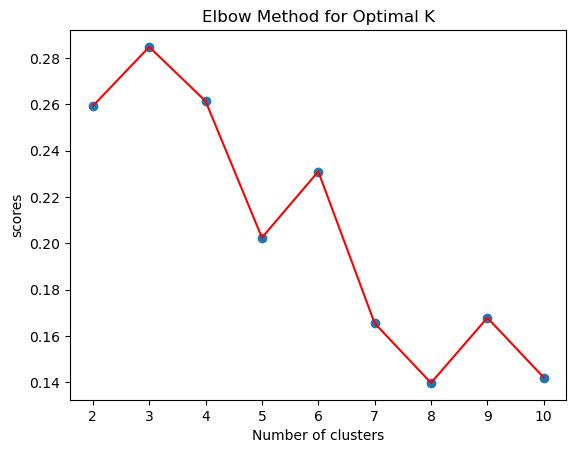

In [16]:
# Elbow method to find the optimal number of clusters
import matplotlib.pyplot as plt

# Plot the Elbow curve
plt.scatter(x=range(2,11),y=scores)
plt.plot(range(2,11),scores,color="red")
plt.xlabel('Number of clusters')
plt.ylabel('scores')
plt.title('Elbow Method for Optimal K')
plt.show

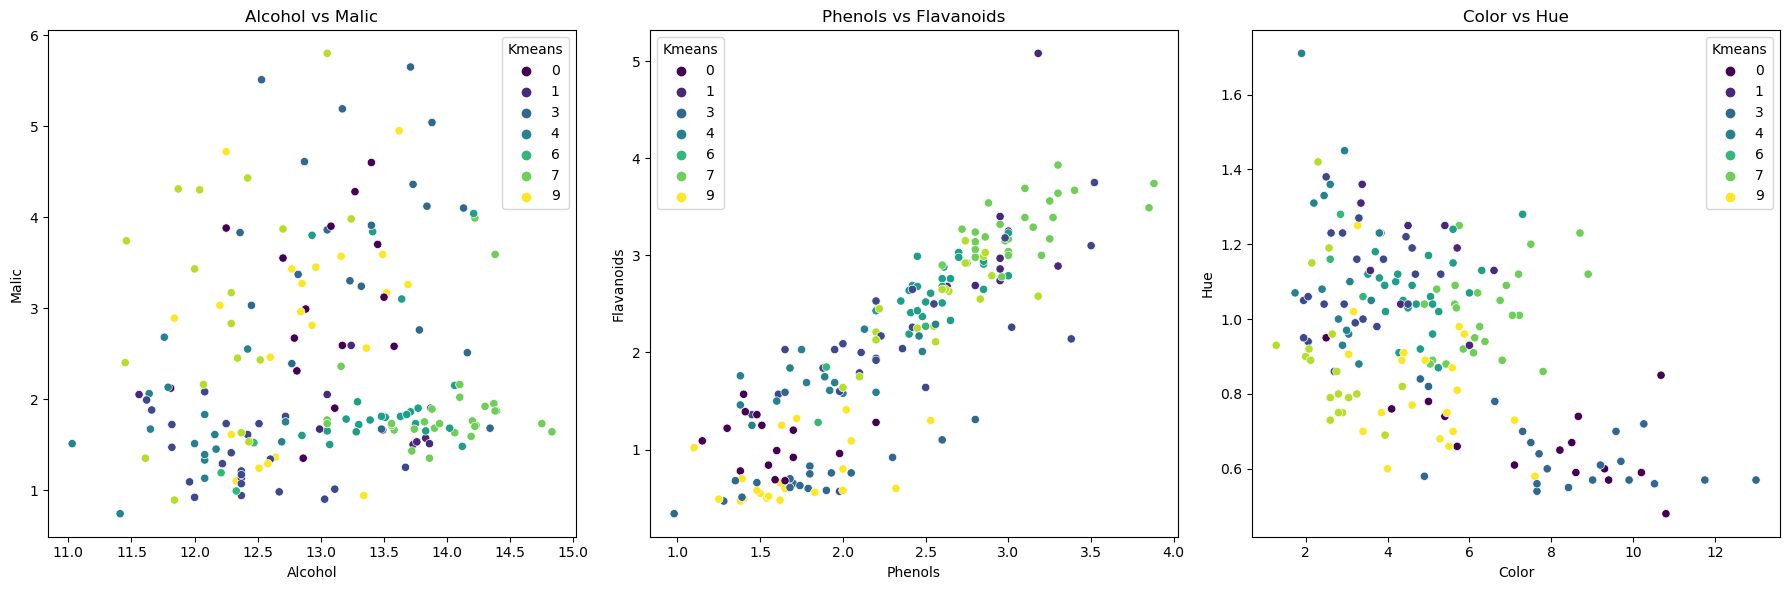

In [17]:
# Visualize the plot
import seaborn as sns
import matplotlib.pyplot as plt

# Select a few feature pairs to plot
feature_pairs = [
    ('Alcohol', 'Malic'),
    ('Phenols', 'Flavanoids'),
    ('Color', 'Hue')
]

plt.figure(figsize=(18, 6))
for i, (feature1, feature2) in enumerate(feature_pairs):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=wine_data, x=feature1, y=feature2, hue='Kmeans', palette='viridis', marker='o')
    plt.title(f'{feature1} vs {feature2}')

plt.tight_layout()
plt.show()


In [18]:
# Evaluating the clustering performance using metrics such as silhouette score or Davies–Bouldin index.
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(wine_data_scaled, wine_data["Kmeans"])
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Calculate Davies–Bouldin Index
davies_bouldin_avg = davies_bouldin_score(wine_data_scaled, wine_data["Kmeans"])
print(f'Davies–Bouldin Index: {davies_bouldin_avg:.2f}')


Silhouette Score: 0.14
Davies–Bouldin Index: 1.69


# Task 4: Clustering with PCA Data:

In [19]:
# K-Means Clustering 
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)

# Fitting with inputs
km=km.fit(PC)

# Predict the cluster
PC['Km']=km.predict(PC)



C:\Users\patil\anaconda3\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patil\anaconda3\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
# silhouette score
from sklearn.metrics import silhouette_score
silhouettescore=silhouette_score(PC,PC["Km"])
silhouettescore

0.31343386573104143

In [21]:
# K-Means Clustering scores
scores=[]

for i in range(2,11):
    km=KMeans(n_clusters=i)
    km=km.fit(wine_data_scaled)
    wine_data["Km"]=km.predict(wine_data_scaled)
    scores.append(silhouette_score(PC,PC["Km"]))
print("# K-Means Clustering scores : ",scores)


C:\Users\patil\anaconda3\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patil\anaconda3\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patil\anaconda3\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patil\anaconda3\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

# K-Means Clustering scores :  [0.31343386573104143, 0.31343386573104143, 0.31343386573104143, 0.31343386573104143, 0.31343386573104143, 0.31343386573104143, 0.31343386573104143, 0.31343386573104143, 0.31343386573104143]


<function matplotlib.pyplot.show(close=None, block=None)>

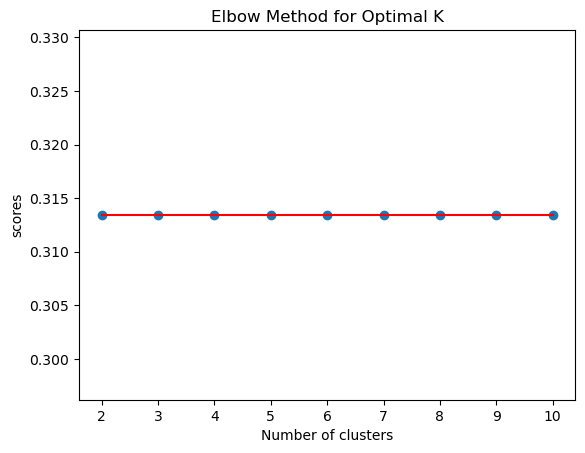

In [22]:
# Elbow method to find the optimal number of clusters
import matplotlib.pyplot as plt

# Plot the Elbow curve
plt.scatter(x=range(2,11),y=scores)
plt.plot(range(2,11),scores,color="red")
plt.xlabel('Number of clusters')
plt.ylabel('scores')
plt.title('Elbow Method for Optimal K')
plt.show

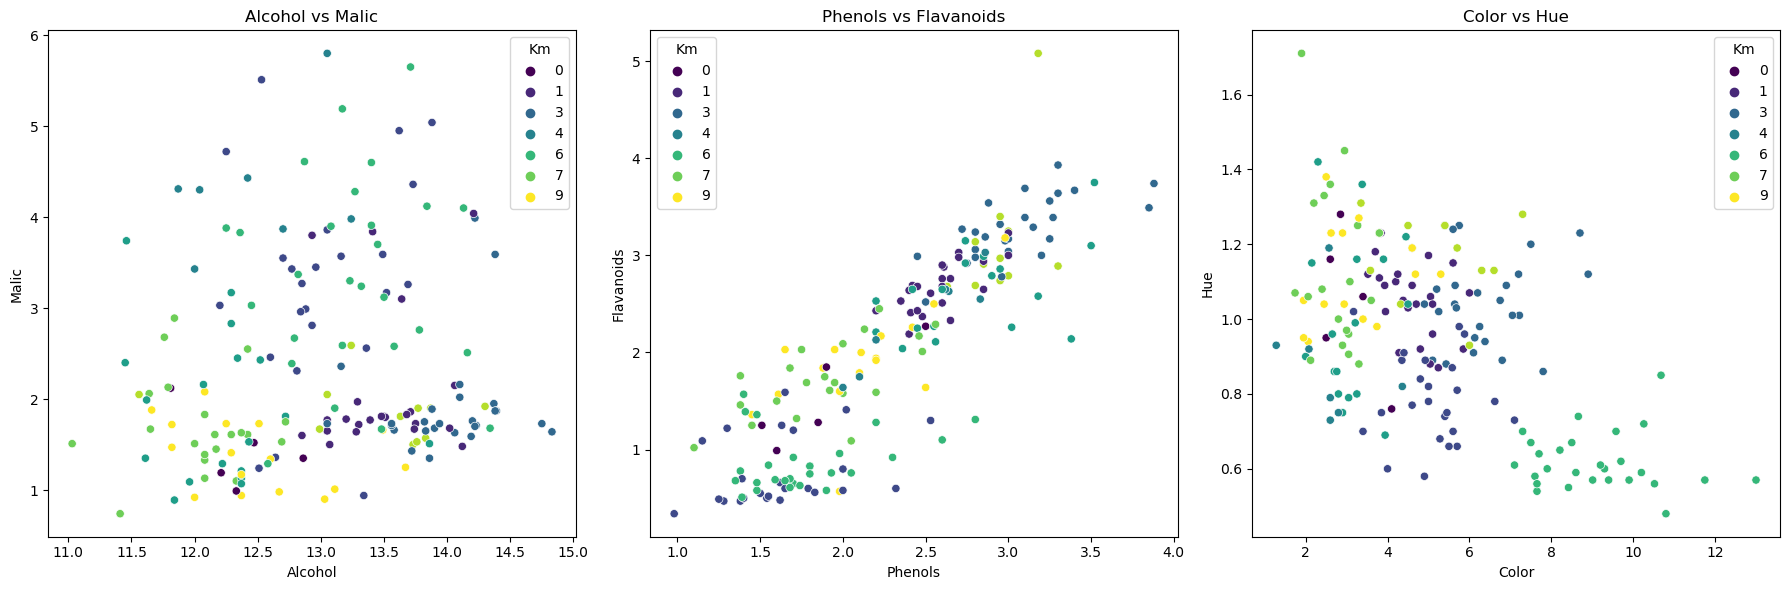

In [23]:
# Visualize the plot
import seaborn as sns
import matplotlib.pyplot as plt

# Select a few feature pairs to plot
feature_pairs = [
    ('Alcohol', 'Malic'),
    ('Phenols', 'Flavanoids'),
    ('Color', 'Hue')
]

plt.figure(figsize=(18, 6))
for i, (feature1, feature2) in enumerate(feature_pairs):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=wine_data, x=feature1, y=feature2, hue='Km', palette='viridis', marker='o')
    plt.title(f'{feature1} vs {feature2}')

plt.tight_layout()
plt.show()

In [24]:
# Evaluating the clustering performance using metrics such as silhouette score or Davies–Bouldin index.
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(PC, PC["Km"])
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Calculate Davies–Bouldin Index
davies_bouldin_avg = davies_bouldin_score(PC, PC["Km"])
print(f'Davies–Bouldin Index: {davies_bouldin_avg:.2f}')



Silhouette Score: 0.31
Davies–Bouldin Index: 1.31


# Task 5: Comparison and Analysis:

In [25]:
# Comparing the clustering results obtained from the original dataset and PCA-transformed data.

# Calculate the silhouette scores for both clusterings.
original_silhouette_score = silhouette_score(wine_data_scaled, wine_data["Kmeans"])
pca_silhouette_score = silhouette_score(PC, PC["Km"])

# Compare the silhouette scores.
if original_silhouette_score > pca_silhouette_score:
  print("The clustering results obtained from the original dataset are better.")
elif pca_silhouette_score > original_silhouette_score:
  print("The clustering results obtained from the PCA-transformed data are better.")
else:
  print("The clustering results obtained from the original dataset and PCA-transformed data are equally good.")



The clustering results obtained from the PCA-transformed data are better.


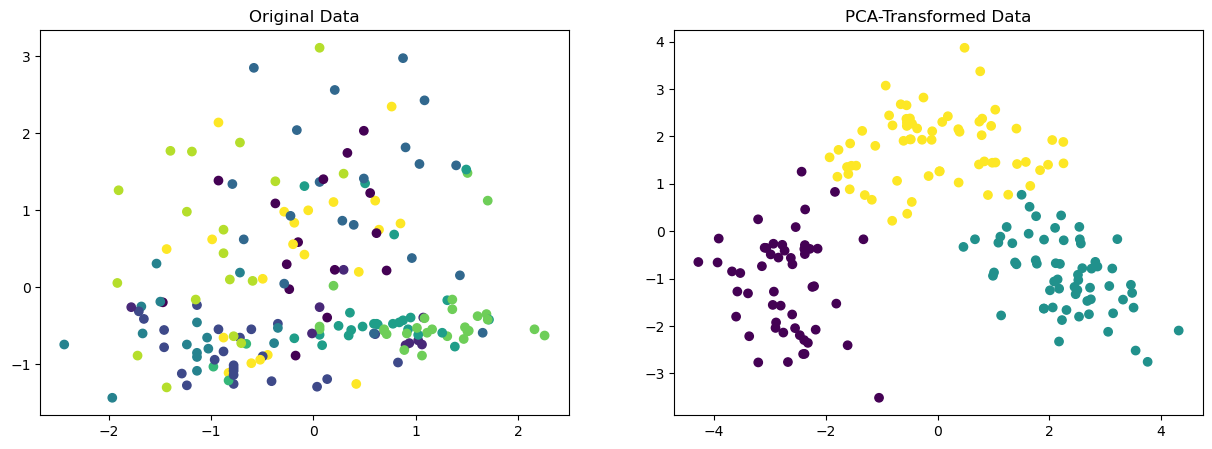

In [26]:
# Compare the clustering results using the map

#  Visualize the clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Original data
plt.subplot(1, 2, 1)
plt.scatter(wine_data_scaled[:, 0], wine_data_scaled[:, 1], c=wine_data["Kmeans"])
plt.title("Original Data")

# PCA-transformed data
plt.subplot(1, 2, 2)
plt.scatter(PC.iloc[:, 0], PC.iloc[:, 1], c=PC["Km"])
plt.title("PCA-Transformed Data")

plt.show()


In [27]:
# Discussed any similarities or differences observed in the clustering results
'''Similarities
Cluster Centers: The general positions of the cluster centers (centroids) may be similar, 
as PCA preserves the overall structure and variance of the original data.

Cluster Membership: Many data points might belong to the same clusters in both the original and PCA-transformed datasets, 
indicating that the clusters are robust and represent genuine groupings in the data.

Inter-cluster Relationships: The relative relationships between clusters might be similar since PCA maintains the original data's variance.
e.g., which clusters are closer to each other

Differences

Dimensionality Reduction: PCA reduces the dimensionality of the data, 
which can sometimes merge small clusters or separate closely related clusters differently than in the high-dimensional space.

Cluster Shape and Boundaries: The shape and boundaries of clusters might change. In the high-dimensional space, 
clusters might be more elongated or irregular, whereas in the PCA-transformed space,
they might appear more spherical due to the nature of PCA.

Variance Explanation: In PCA, the first few components explain most of the variance, but not all. 
Some information might be lost, which can lead to slight differences in clustering outcomes.

Visualization: Clustering results in PCA-transformed space are easier to visualize (e.g., in 2D plots), 
which might reveal patterns that are not as easily seen in high-dimensional space.'''


"Similarities\nCluster Centers: The general positions of the cluster centers (centroids) may be similar, \nas PCA preserves the overall structure and variance of the original data.\n\nCluster Membership: Many data points might belong to the same clusters in both the original and PCA-transformed datasets, \nindicating that the clusters are robust and represent genuine groupings in the data.\n\nInter-cluster Relationships: The relative relationships between clusters might be similar since PCA maintains the original data's variance.\ne.g., which clusters are closer to each other\n\nDifferences\n\nDimensionality Reduction: PCA reduces the dimensionality of the data, \nwhich can sometimes merge small clusters or separate closely related clusters differently than in the high-dimensional space.\n\nCluster Shape and Boundaries: The shape and boundaries of clusters might change. In the high-dimensional space, \nclusters might be more elongated or irregular, whereas in the PCA-transformed space,

In [28]:
#  Reflect on the impact of dimensionality reduction on clustering performance.

# PCA can impact clustering performance in several ways:

# - Loss of Information:
#    - PCA discards information by projecting the data onto a lower-dimensional space.
#    - This can lead to the loss of important features or patterns that might be crucial for clustering.
#    - The amount of information lost depends on the number of principal components chosen.

# - Change in Cluster Structure:
#    - PCA can alter the structure of clusters in the transformed space.
#    - Clusters that were well-separated in the original space might become closer or even overlap in the lower-dimensional space.
#    - This can make it more difficult for clustering algorithms to identify and distinguish between clusters.

# - Choice of Clustering Algorithm:
#    - The choice of clustering algorithm can be affected by dimensionality reduction.
#    - Some algorithms, such as k-means, are more sensitive to the shape and density of clusters.
#    - If PCA significantly changes the shape or density of clusters, it might affect the performance of these algorithms.

#  Analyze the trade-offs between using PCA and clustering directly on the original dataset.

# Advantages of using PCA before clustering:

# - Reduced computational cost:
#    - PCA can significantly reduce the dimensionality of the data, making clustering algorithms more computationally efficient.
#    - This is particularly beneficial for large datasets or high-dimensional data.

# - Improved interpretability:
#    - Clustering results in the lower-dimensional space might be easier to interpret and visualize.
#    - This can be advantageous for understanding the underlying structure of the data and identifying patterns or outliers.

# - Reduced noise and dimensionality:
#    - PCA can help to reduce noise and irrelevant features in the data.
#    - This can improve the performance of clustering algorithms by focusing on the most important features.

# Disadvantages of using PCA before clustering:

# - Loss of information:
#    - PCA discards information by projecting the data onto a lower-dimensional space.
#    - This can lead to the loss of important features or patterns that might be crucial for clustering.
#    - The amount of information lost depends on the number of principal components chosen.

# - Change in cluster structure:
#    - PCA can alter the structure of clusters in the transformed space.
#    - Clusters that were well-separated in the original space might become closer or even overlap in the lower-dimensional space.
#    - This can make it more difficult for clustering algorithms to identify and distinguish between clusters.

# - Choice of clustering algorithm:
#    - The choice of clustering algorithm can be affected by dimensionality reduction.
#    - Some algorithms, such as k-means, are more sensitive to the shape and density of clusters.
#    - If PCA significantly changes the shape or density of clusters, it might affect the performance of these algorithms.



# Task 6: Conclusion and Insights

In [29]:
# 1. Key Findings and Insights:

# - PCA can significantly reduce the dimensionality of data, leading to improved computational efficiency and interpretability.
# - However, PCA can also result in the loss of important information, which can impact the performance of clustering algorithms.
# - The choice of clustering algorithm can be affected by dimensionality reduction, and some algorithms are more sensitive to the shape and density of clusters.
# - Cluster validation metrics might be affected by dimensionality reduction, and it's important to choose appropriate metrics and interpret the results in the context of the dimensionality reduction.

# 2. Practical Implications of PCA and Clustering in Data Analysis:

# - PCA can be used as a preprocessing step for clustering to reduce computational cost and improve interpretability.
# - Clustering can be used to identify groups or patterns in data, which can be useful for various tasks such as customer segmentation, fraud detection, or anomaly detection.
# - The choice of PCA and clustering techniques should be based on the specific characteristics of the data and the desired outcome.

# 3. Recommendations for When to Use Each Technique:

# - Use PCA when:
#   - The goal is to reduce computational cost and improve interpretability.
#   - The data contains redundant or irrelevant features.
#   - The chosen clustering algorithm is not sensitive to the shape and density of clusters.
# - Use clustering directly on the original data when:
#   - The data contains important information that might be lost during dimensionality reduction.
#   - The chosen clustering algorithm is sensitive to the shape and density of clusters.
#   - The goal is to identify fine-grained clusters or subtle patterns in the data.

